In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (roc_curve, auc, ConfusionMatrixDisplay,
                            recall_score,precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

In [2]:
df = pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
df.shape

(396030, 27)

In [4]:
df['loan_status'].nunique()

2

Binary Classification only 2 classes

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64


C:\Users\prave\AppData\Local\Temp\ipykernel_25632\2074319702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['loan_status'], edgecolor = 'black', palette=['pink', 'lavender'])


<Axes: xlabel='count', ylabel='loan_status'>

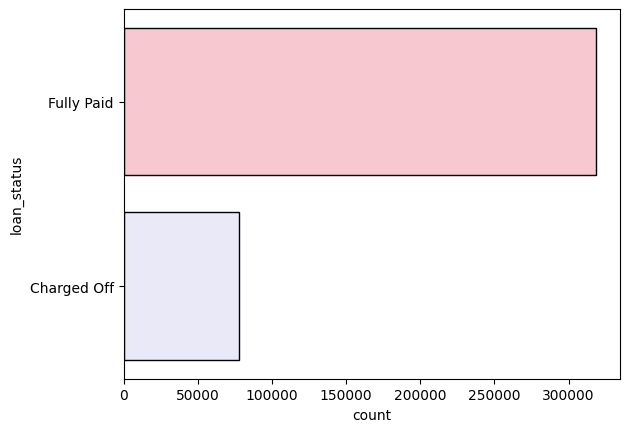

In [5]:
print(df['loan_status'].value_counts(normalize=True)*100)

sns.countplot(df['loan_status'], edgecolor = 'black', palette=['pink', 'lavender'])

Imbalanced Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [8]:
np.round((df.isna().sum()/len(df))*100,2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

Null Value Treartment

In [9]:
df['mort_acc'].fillna(value=df['mort_acc'].mean(), inplace=True)

In [10]:
df['emp_title'].fillna(value= 'Others', inplace= True)
df['emp_length'].fillna(value=df['emp_length'].mode()[0], inplace=True)
df.dropna(inplace=True)
np.round((df.isna().sum()/len(df))*100,2)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393464 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393464 non-null  float64
 1   term                  393464 non-null  object 
 2   int_rate              393464 non-null  float64
 3   installment           393464 non-null  float64
 4   grade                 393464 non-null  object 
 5   sub_grade             393464 non-null  object 
 6   emp_title             393464 non-null  object 
 7   emp_length            393464 non-null  object 
 8   home_ownership        393464 non-null  object 
 9   annual_inc            393464 non-null  float64
 10  verification_status   393464 non-null  object 
 11  issue_d               393464 non-null  object 
 12  loan_status           393464 non-null  object 
 13  purpose               393464 non-null  object 
 14  title                 393464 non-null  object 
 15  dti  

In [12]:
num_cols = [i for i in df.columns if (df[i].dtype == 'float64')]
num_cols

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

Distribution Check

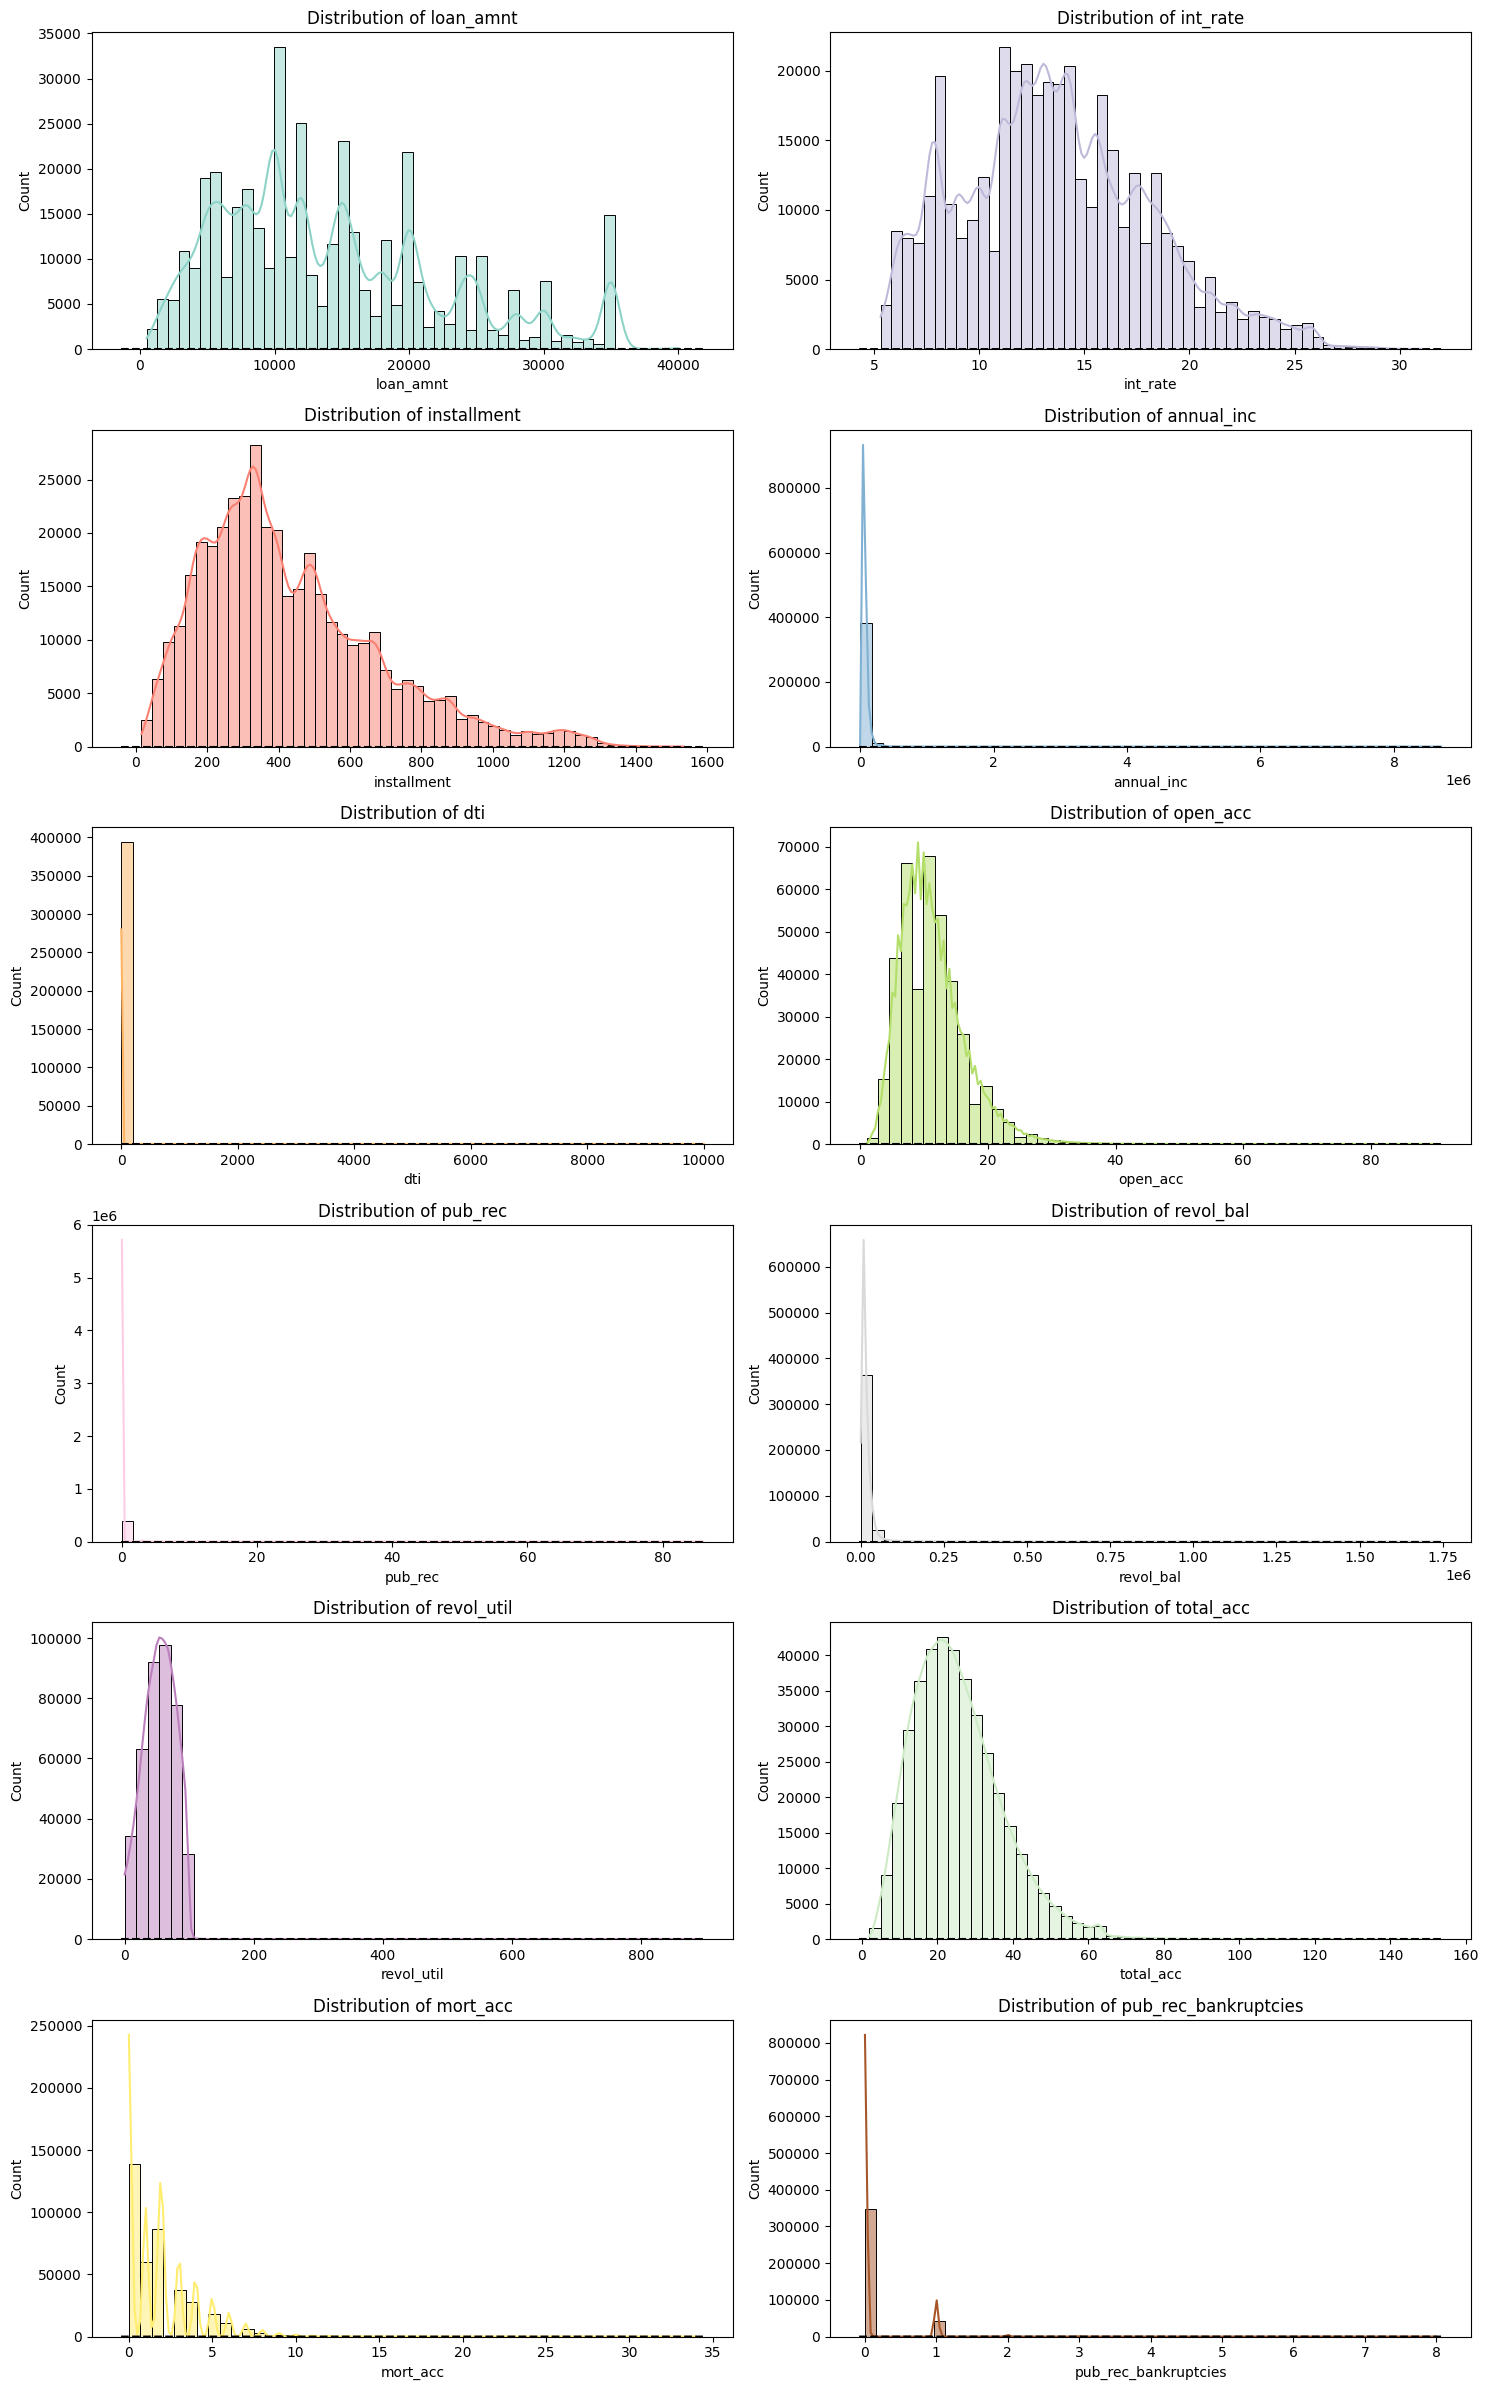

In [13]:
cols = 2
rows = (len(num_cols) + cols - 1) // cols  

colors = [
    "#8dd3c7", "#bebada", "#fb8072", "#80b1d3", "#fdb462",
    "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5",
    "#ffed6f", "#a65628", "#1f78b4"
]

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=50, ax=axes[i // cols, i % cols], color= colors[i])
    sns.kdeplot(df[col], ax=axes[i // cols, i % cols], color='black', linestyle='dashed')

    axes[i // cols, i % cols].set_title("Distribution of {}".format(col))


for i in range(len(num_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [14]:
df['emp_title'].value_counts()

emp_title
Others                  22668
Teacher                  4368
Manager                  4232
Registered Nurse         1841
RN                       1840
                        ...  
Sales Managment             1
Belanger                    1
OMIV Supervisor             1
SVP, Technology             1
Gracon Services, Inc        1
Name: count, Length: 172226, dtype: int64

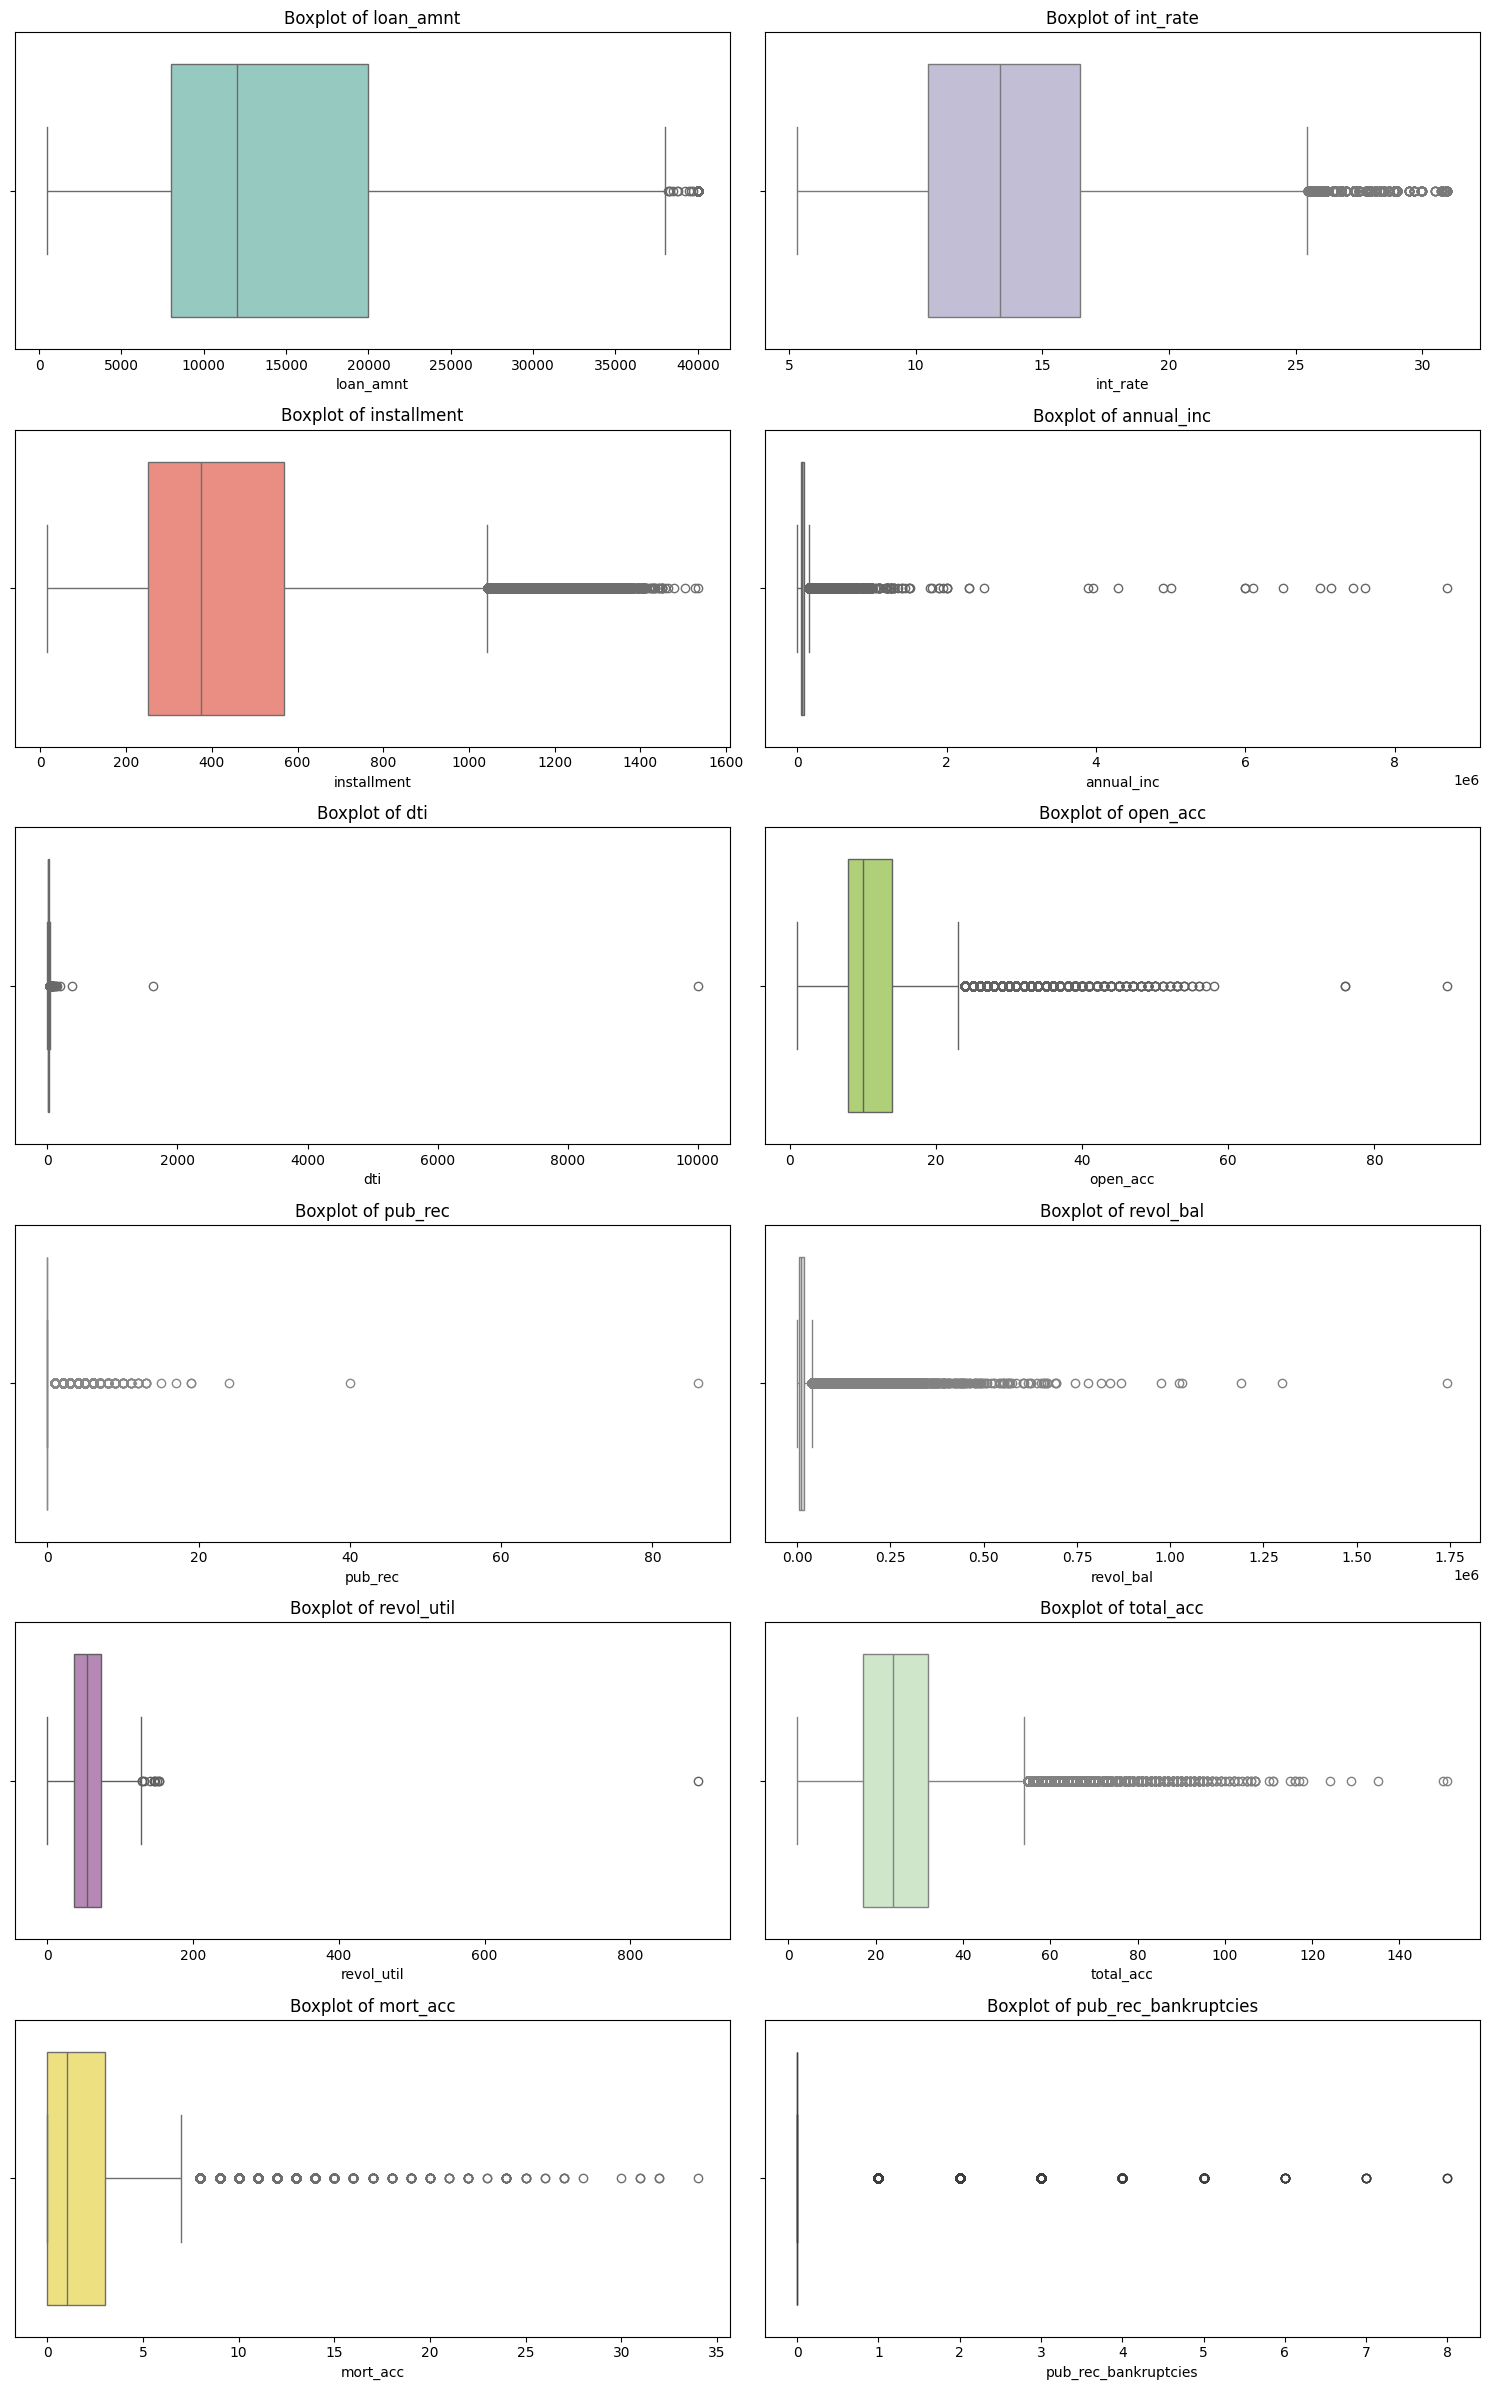

In [15]:
cols = 2
rows = (len(num_cols) + cols - 1) // cols  

colors = [
    "#8dd3c7", "#bebada", "#fb8072", "#80b1d3", "#fdb462",
    "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5",
    "#ffed6f", "#a65628", "#1f78b4"
]

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i // cols, i % cols], color=colors[i])
    axes[i // cols, i % cols].set_title("Boxplot of {}".format(col))

for i in range(len(num_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


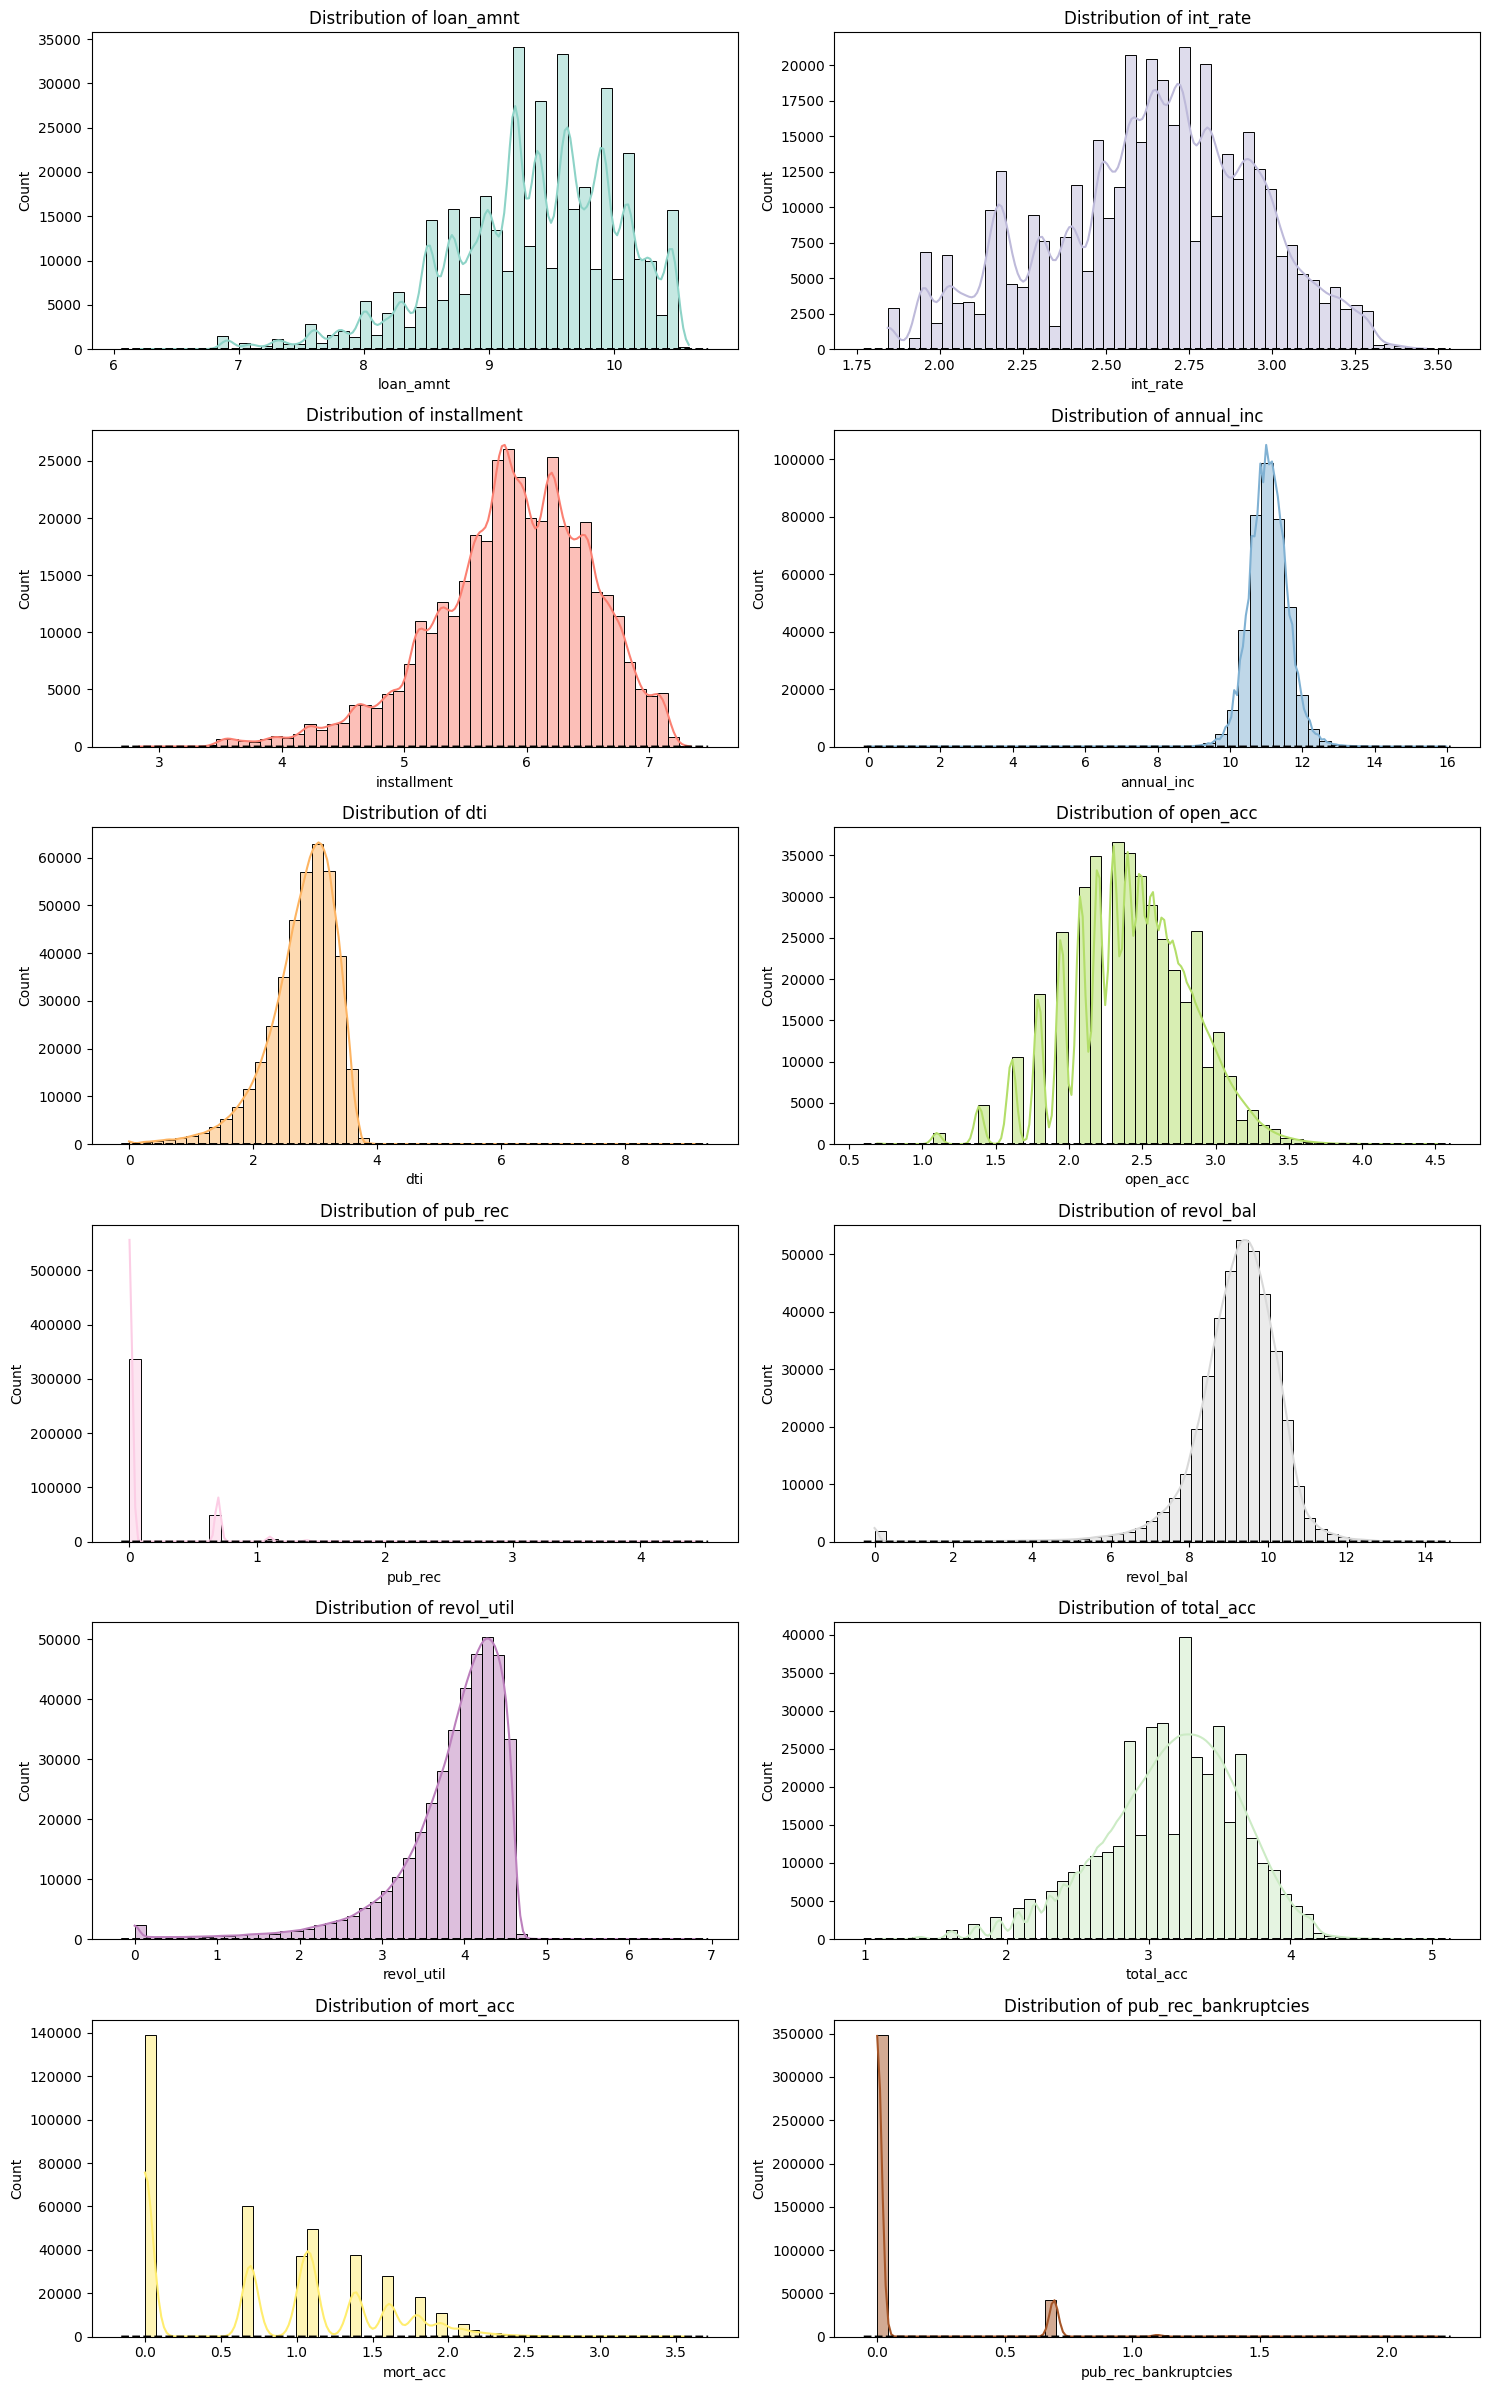

In [16]:
k = pd.DataFrame()

for i in num_cols:
    k[i] = np.log1p(df[i])
cols = 2
rows = (len(num_cols) + cols - 1) // cols  

colors = [
    "#8dd3c7", "#bebada", "#fb8072", "#80b1d3", "#fdb462",
    "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5",
    "#ffed6f", "#a65628", "#1f78b4"
]

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, col in enumerate(num_cols):
    sns.histplot(k[col], kde=True, bins=50, ax=axes[i // cols, i % cols], color= colors[i])
    sns.kdeplot(k[col], ax=axes[i // cols, i % cols], color='black', linestyle='dashed')

    axes[i // cols, i % cols].set_title("Distribution of {}".format(col))


for i in range(len(num_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



1.All the continuous variables are skewed to any one side.



2.Indicating a heavy influence of Outliers.

C:\Users\prave\AppData\Local\Temp\ipykernel_25632\4204654465.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i // cols, i % cols], palette=sns.color_palette("husl"))
C:\Users\prave\AppData\Local\Temp\ipykernel_25632\4204654465.py:10: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(x=df[col], ax=axes[i // cols, i % cols], palette=sns.color_palette("husl"))
C:\Users\prave\AppData\Local\Temp\ipykernel_25632\4204654465.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i // cols, i % cols], palette=sns.color_palette("husl"))
C:\Users\prave\AppData\Local\Temp\ipykernel_25632\4204654465

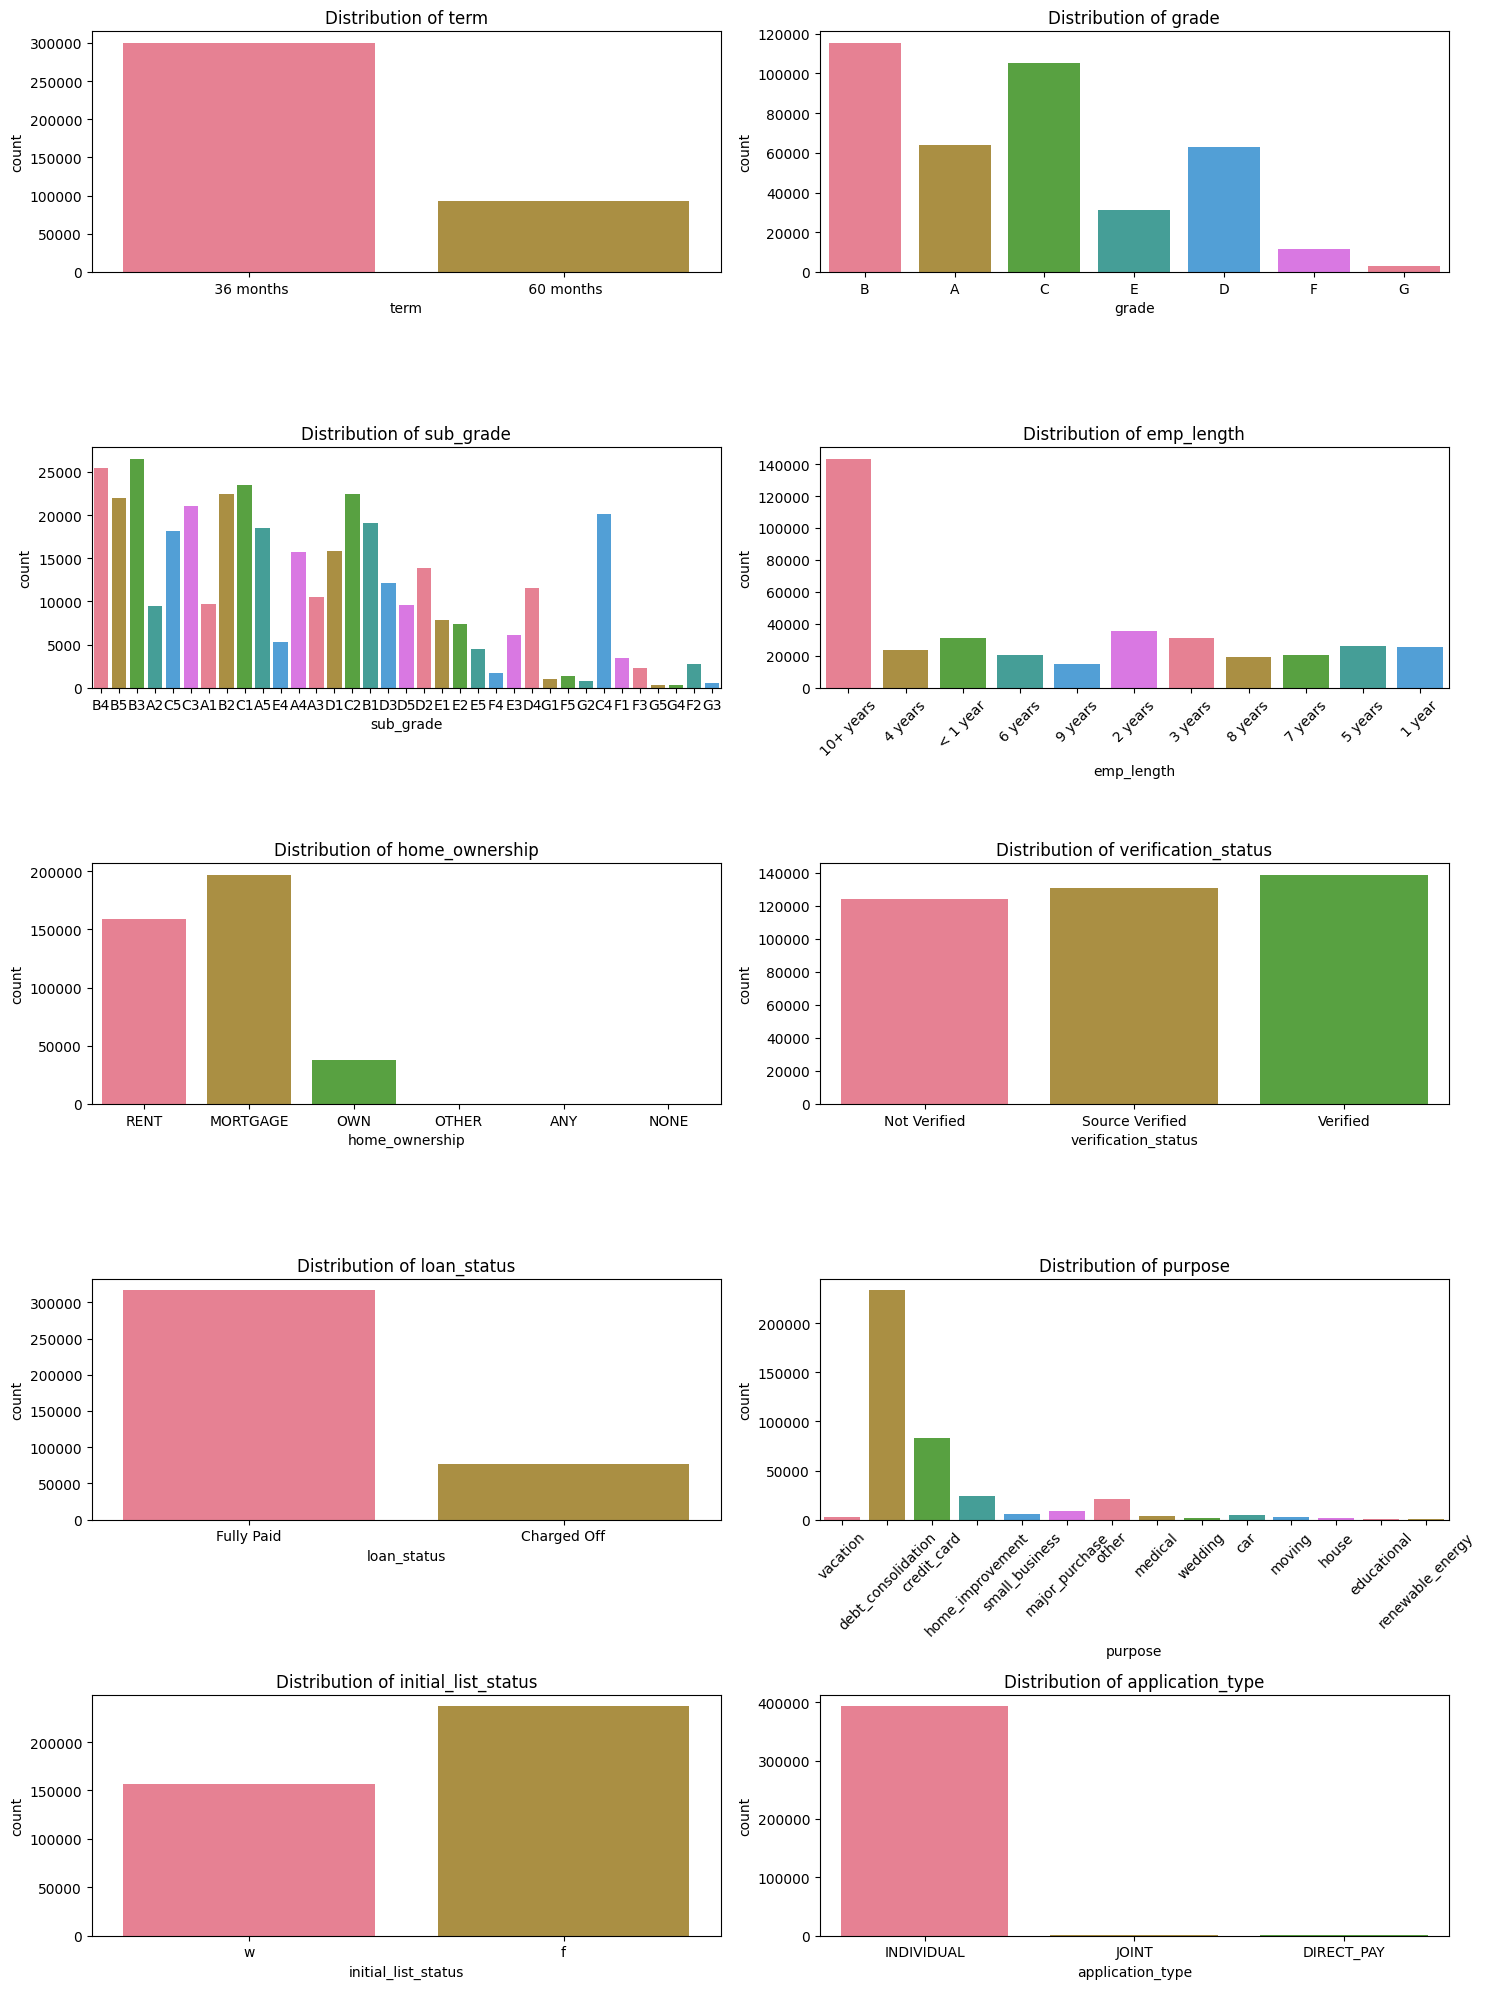

In [17]:
# Assuming cat_cols is a list of categorical column names in your DataFrame
cat_cols = [i for i in df.columns if (df[i].dtype != 'float64') and (df[i].nunique() < 50)]

cols = 2
rows = (len(cat_cols) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i // cols, i % cols], palette=sns.color_palette("husl"))
    axes[i // cols, i % cols].set_title("Distribution of {}".format(col))
    if i in [3,7]:
        axes[i // cols, i % cols].tick_params(axis='x', rotation = 45)  # Rotate x-axis labels
    else:
        axes[i // cols, i % cols].tick_params(axis='x')
for i in range(len(cat_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


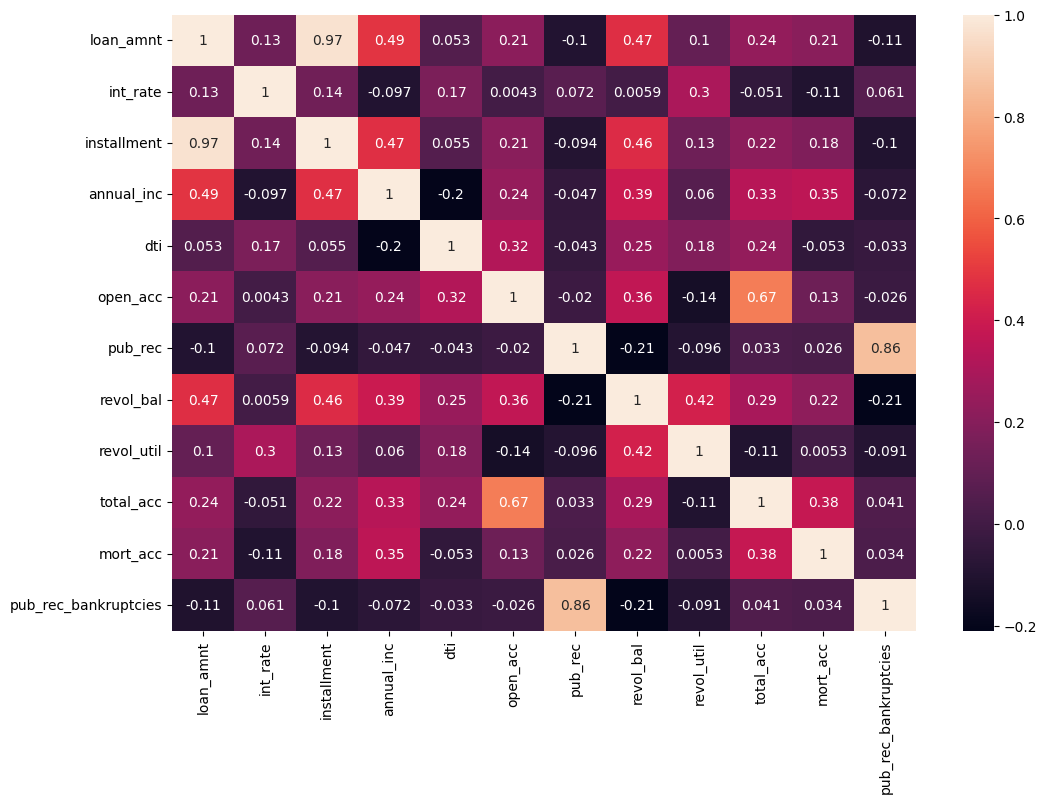

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(method='spearman'), annot=True)
plt.show()

* Can drop either "loan_amnt" or "installment" as they are perfectly correlated.

In [19]:
df.shape

(393464, 27)

Outlier Treatment
    
    
Capping Outliers

In [20]:
for col in num_cols:
    uppers = df[col].quantile(0.90)

    df[col] = df[col].apply(lambda x: x if x > uppers else x)

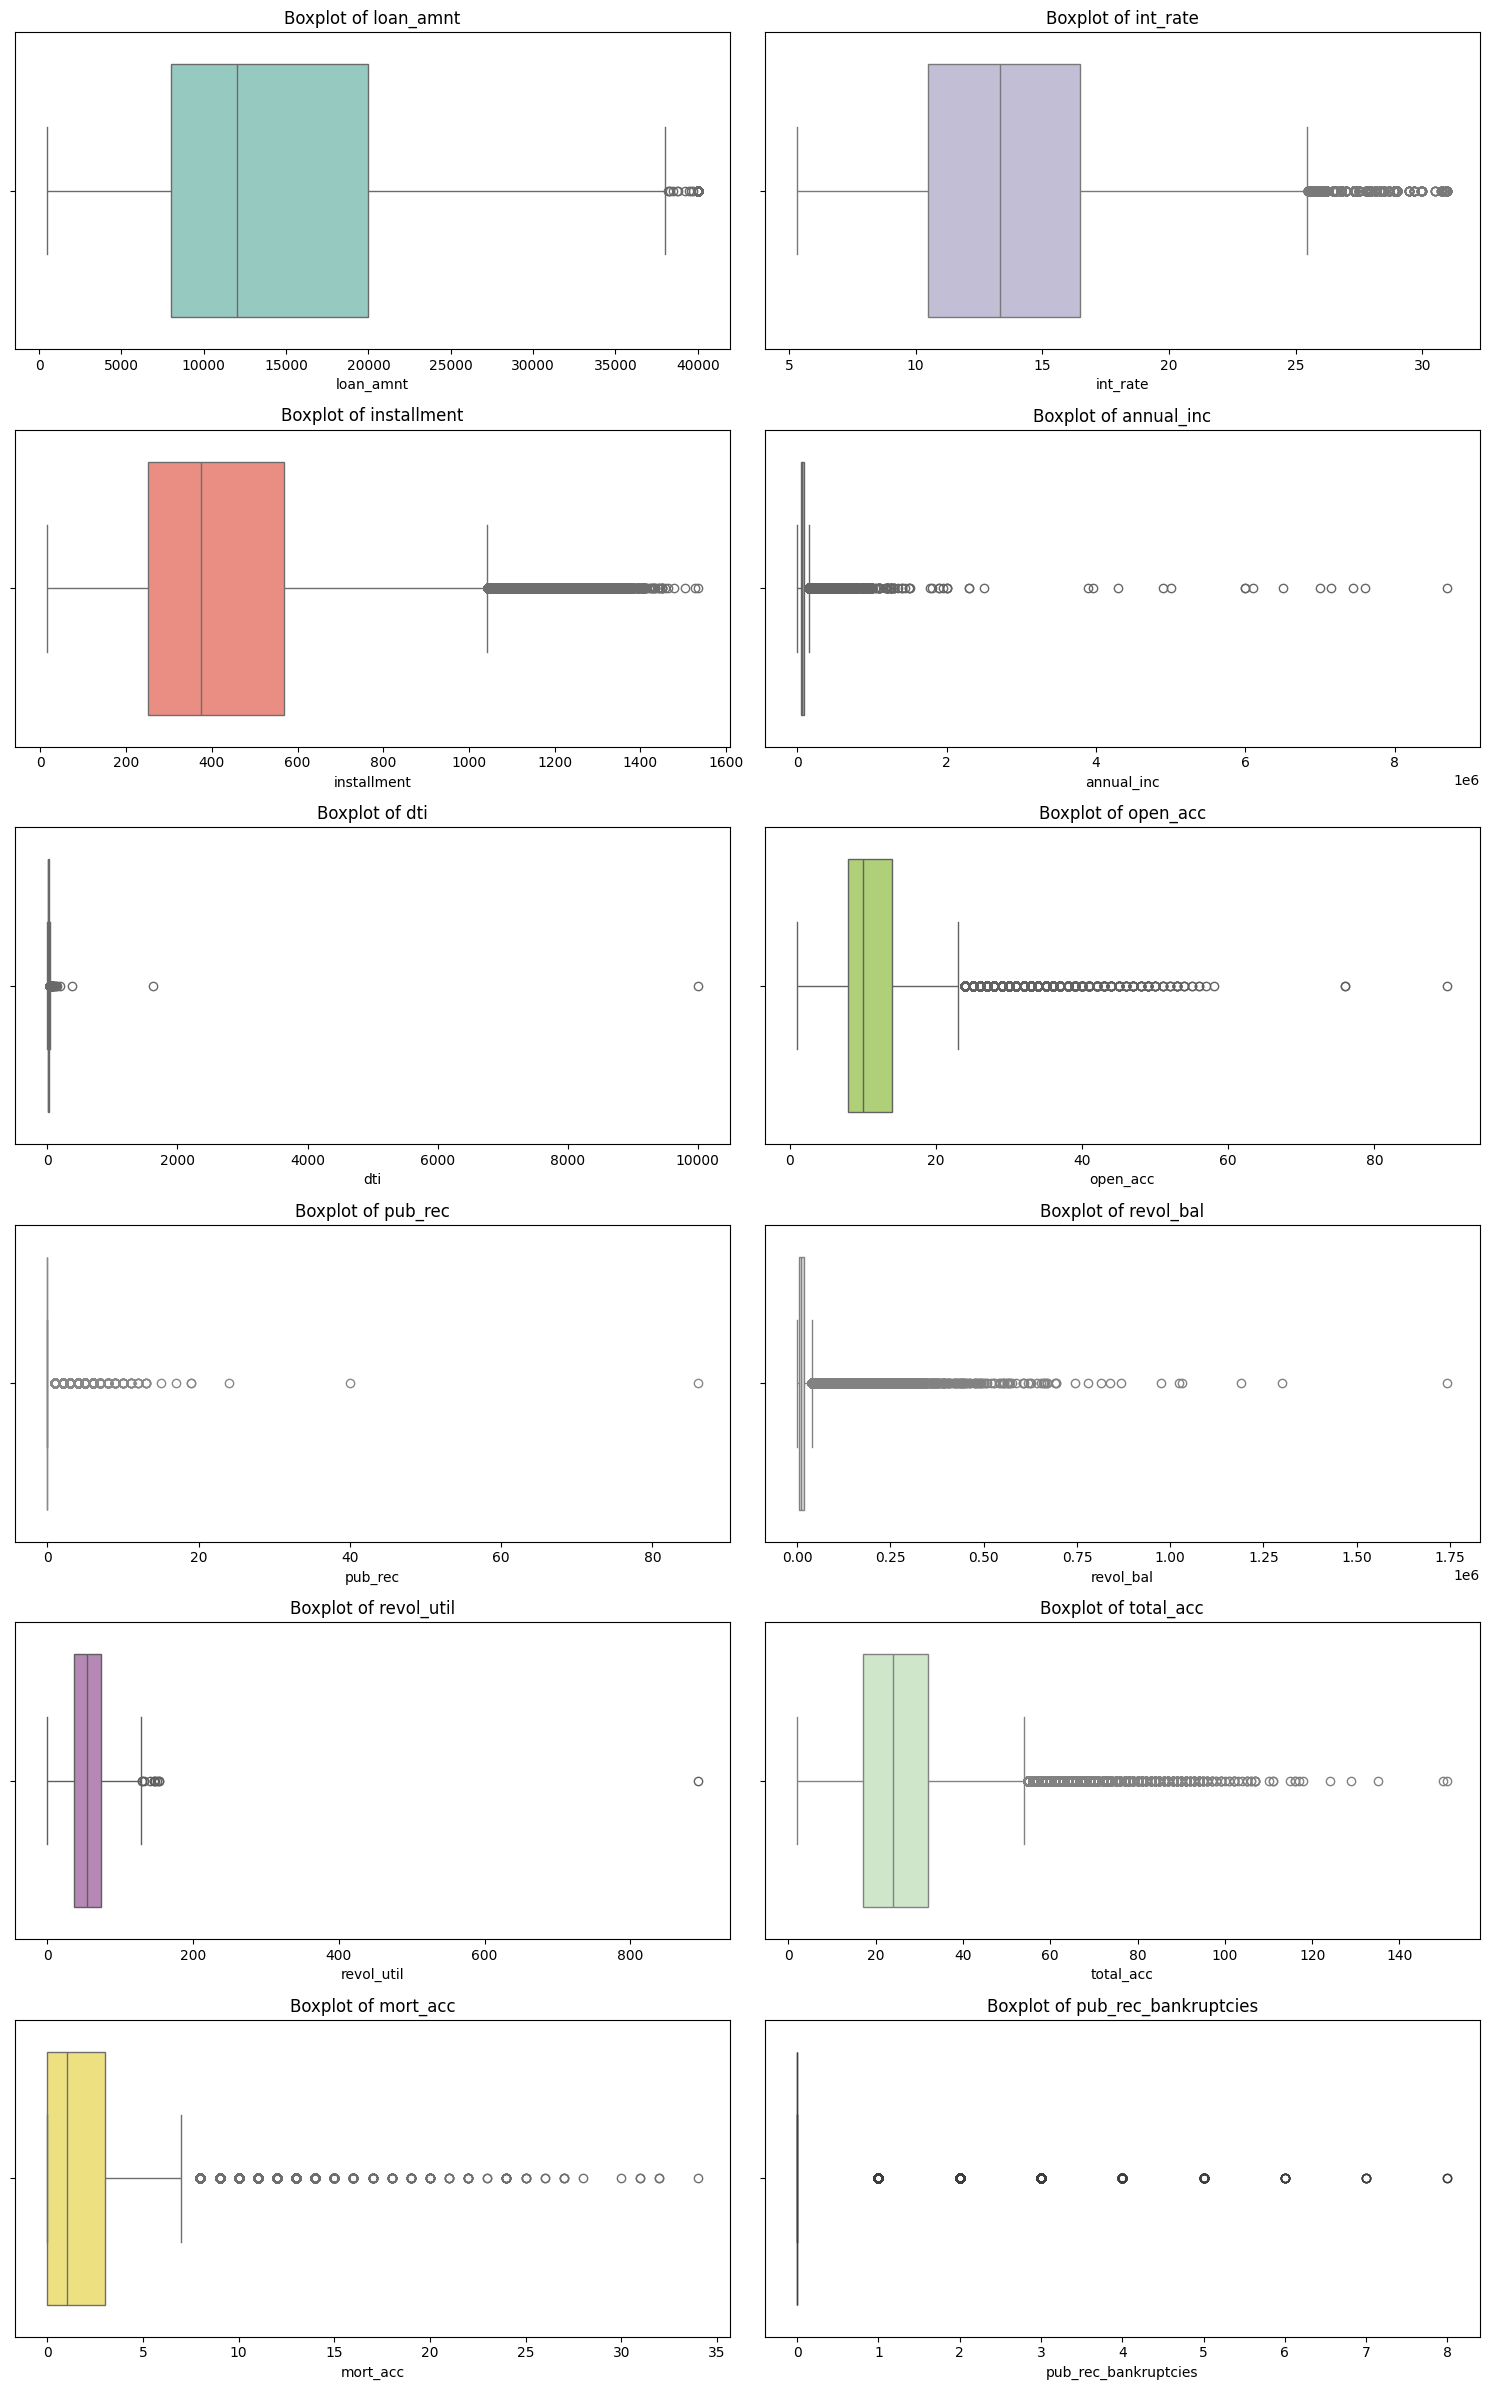

In [21]:
cols = 2
rows = (len(num_cols) + cols - 1) // cols  

colors = [
    "#8dd3c7", "#bebada", "#fb8072", "#80b1d3", "#fdb462",
    "#b3de69", "#fccde5", "#d9d9d9", "#bc80bd", "#ccebc5",
    "#ffed6f", "#a65628", "#1f78b4"
]

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i // cols, i % cols], color=colors[i])
    axes[i // cols, i % cols].set_title("Boxplot of {}".format(col))

for i in range(len(num_cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Not cleaning all outliers to enable Noise in the data

Preprocessing

Address Extraction

In [22]:
df[['state', 'ZIP']] = df["address"].str.split().apply(lambda x: pd.Series([x[-3], x[-1]]))

df.drop(columns='address', inplace=True)

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,ZIP
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"Mendozaberg,",22690
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"Loganmouth,",05113
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"Sabrina,",05113
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"Delacruzside,",00813
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"Greggshire,",11650


In [23]:
df['ZIP'] =  df['ZIP'].astype('category')

Date handling

In [24]:
issued_dates = pd.to_datetime(df['issue_d'])

df['issued_year'] = issued_dates.dt.year

df['issued_month'] = issued_dates.dt.month

earliest_cr_line = pd.to_datetime(df['earliest_cr_line'])

df['earliest_cr_line_year'] = earliest_cr_line.dt.year

df['earliest_cr_line_month'] = earliest_cr_line.dt.month

df.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)


df.head()

C:\Users\prave\AppData\Local\Temp\ipykernel_25632\3909877882.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  issued_dates = pd.to_datetime(df['issue_d'])
C:\Users\prave\AppData\Local\Temp\ipykernel_25632\3909877882.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earliest_cr_line = pd.to_datetime(df['earliest_cr_line'])


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,ZIP,issued_year,issued_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,w,INDIVIDUAL,0.0,0.0,"Mendozaberg,",22690,2015,1,1990,6
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,f,INDIVIDUAL,3.0,0.0,"Loganmouth,",05113,2015,1,2004,7
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,f,INDIVIDUAL,0.0,0.0,"Sabrina,",05113,2015,1,2007,8
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,f,INDIVIDUAL,0.0,0.0,"Delacruzside,",00813,2014,11,2006,9
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,f,INDIVIDUAL,1.0,0.0,"Greggshire,",11650,2013,4,1999,3


In [25]:
df['term'] = df['term'].apply(lambda x: x[:3]).astype(int)

df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,ZIP,issued_year,issued_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,w,INDIVIDUAL,0.0,0.0,"Mendozaberg,",22690,2015,1,1990,6
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,f,INDIVIDUAL,3.0,0.0,"Loganmouth,",05113,2015,1,2004,7
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,f,INDIVIDUAL,0.0,0.0,"Sabrina,",05113,2015,1,2007,8
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,f,INDIVIDUAL,0.0,0.0,"Delacruzside,",00813,2014,11,2006,9
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,f,INDIVIDUAL,1.0,0.0,"Greggshire,",11650,2013,4,1999,3


Feature Engineering

In [26]:
df['loan_status'].replace({"Fully Paid":0, "Charged Off" : 1},inplace=True)

In [27]:
cat_cols.append('emp_title')

In [28]:
df['pub_rec'] = df['pub_rec'].astype(int).apply(lambda x: 1 if x > 0 else 0)

df['mort_acc'] = df['mort_acc'].astype(int).apply(lambda x: 1 if x > 0 else 0)

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int).apply(lambda x: 1 if x > 0 else 0)

df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,ZIP,issued_year,issued_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,w,INDIVIDUAL,0,0,"Mendozaberg,",22690,2015,1,1990,6
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,f,INDIVIDUAL,1,0,"Loganmouth,",05113,2015,1,2004,7
2,15600.0,36,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,f,INDIVIDUAL,0,0,"Sabrina,",05113,2015,1,2007,8
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,f,INDIVIDUAL,0,0,"Delacruzside,",00813,2014,11,2006,9
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,f,INDIVIDUAL,1,0,"Greggshire,",11650,2013,4,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,w,INDIVIDUAL,0,0,"Johnnyville,",30723,2015,10,2004,11
396026,21000.0,36,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,f,INDIVIDUAL,1,0,"Rachelborough,",05113,2015,2,2006,2
396027,5000.0,36,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,f,INDIVIDUAL,0,0,"Reedfort,",70466,2013,10,1997,3
396028,21000.0,60,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,f,INDIVIDUAL,1,0,"Michael,",29597,2012,8,1990,11


Dropping "installment" as 'loan_amnt' & 'installment' are almost perfectly correlated. 

In [29]:
df.drop(columns='installment', inplace=True)

Measuring Correlation between Grade & Sub-Grade

In [30]:
from scipy.stats import chi2_contingency

cor = pd.crosstab(df['grade'], df['sub_grade'])

_,p_value, _, _ = chi2_contingency(cor)

p_value

0.0

p-value = 0 indicates significant assosciation between them.


Can drop any of the two columns

In [31]:
df.drop(columns='grade', inplace=True)
df.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,state,ZIP,issued_year,issued_month,earliest_cr_line_year,earliest_cr_line_month
0,10000.0,36,11.44,B4,Marketing,10+ years,RENT,117000.0,Not Verified,0,...,w,INDIVIDUAL,0,0,"Mendozaberg,",22690,2015,1,1990,6
1,8000.0,36,11.99,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,0,...,f,INDIVIDUAL,1,0,"Loganmouth,",05113,2015,1,2004,7
2,15600.0,36,10.49,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,0,...,f,INDIVIDUAL,0,0,"Sabrina,",05113,2015,1,2007,8
3,7200.0,36,6.49,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,0,...,f,INDIVIDUAL,0,0,"Delacruzside,",00813,2014,11,2006,9
4,24375.0,60,17.27,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,1,...,f,INDIVIDUAL,1,0,"Greggshire,",11650,2013,4,1999,3


In [32]:
cat_cols = ['sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'state',
 'ZIP',
 'issued_year',
 'issued_month',
 'earliest_cr_line_year',
 'earliest_cr_line_month',
 'term']

for i in cat_cols:
    df[i] = df[i].astype('object')

In [33]:
df["home_ownership"].value_counts(dropna=False)

home_ownership
MORTGAGE    197109
RENT        158770
OWN          37443
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [34]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x == 'ANY' or x == 'NONE' else x)

In [35]:
X = df.drop(["loan_status"],axis = 1)
y = df["loan_status"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [37]:
cat_cols = [i for i in x_train.columns if (df[i].dtype == 'object')]

In [38]:
def pre_process(x, y):
    for col in cat_cols:
        from category_encoders import TargetEncoder

        te = TargetEncoder()

        x[col] = te.fit_transform(x[col], y)

    return x

In [39]:
x_train = pre_process(x_train, y_train)

In [40]:
x_test = pre_process(x_test, y_test)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

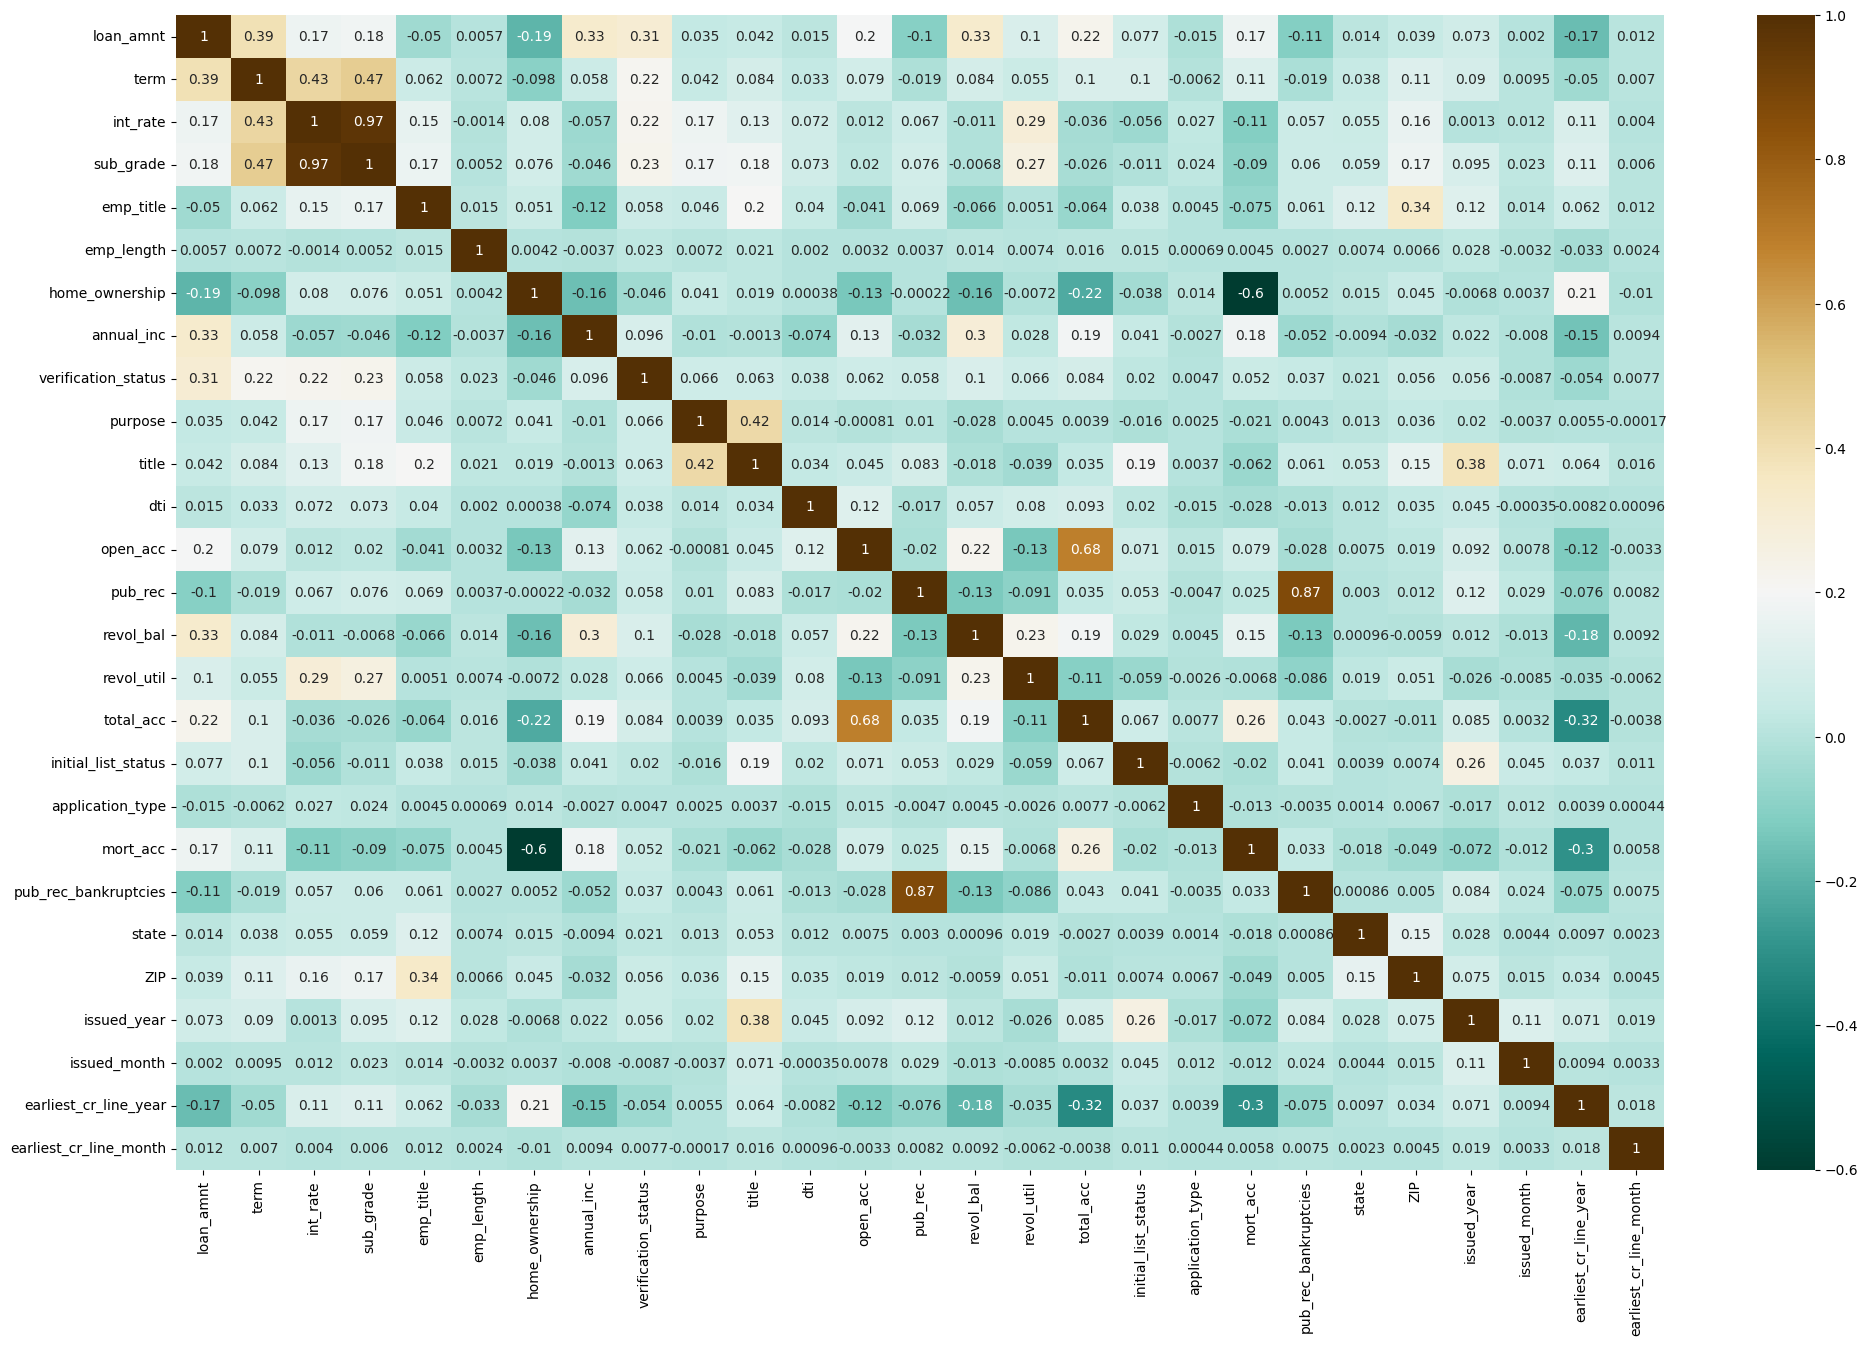

In [42]:
plt.figure(figsize=(24,15))
sns.heatmap(x_train.corr(),annot=True,cmap='BrBG_r')

plt.show()

* Can drop int_rate or sub_grade 

In [43]:
x_train.drop(columns='int_rate', inplace=True)

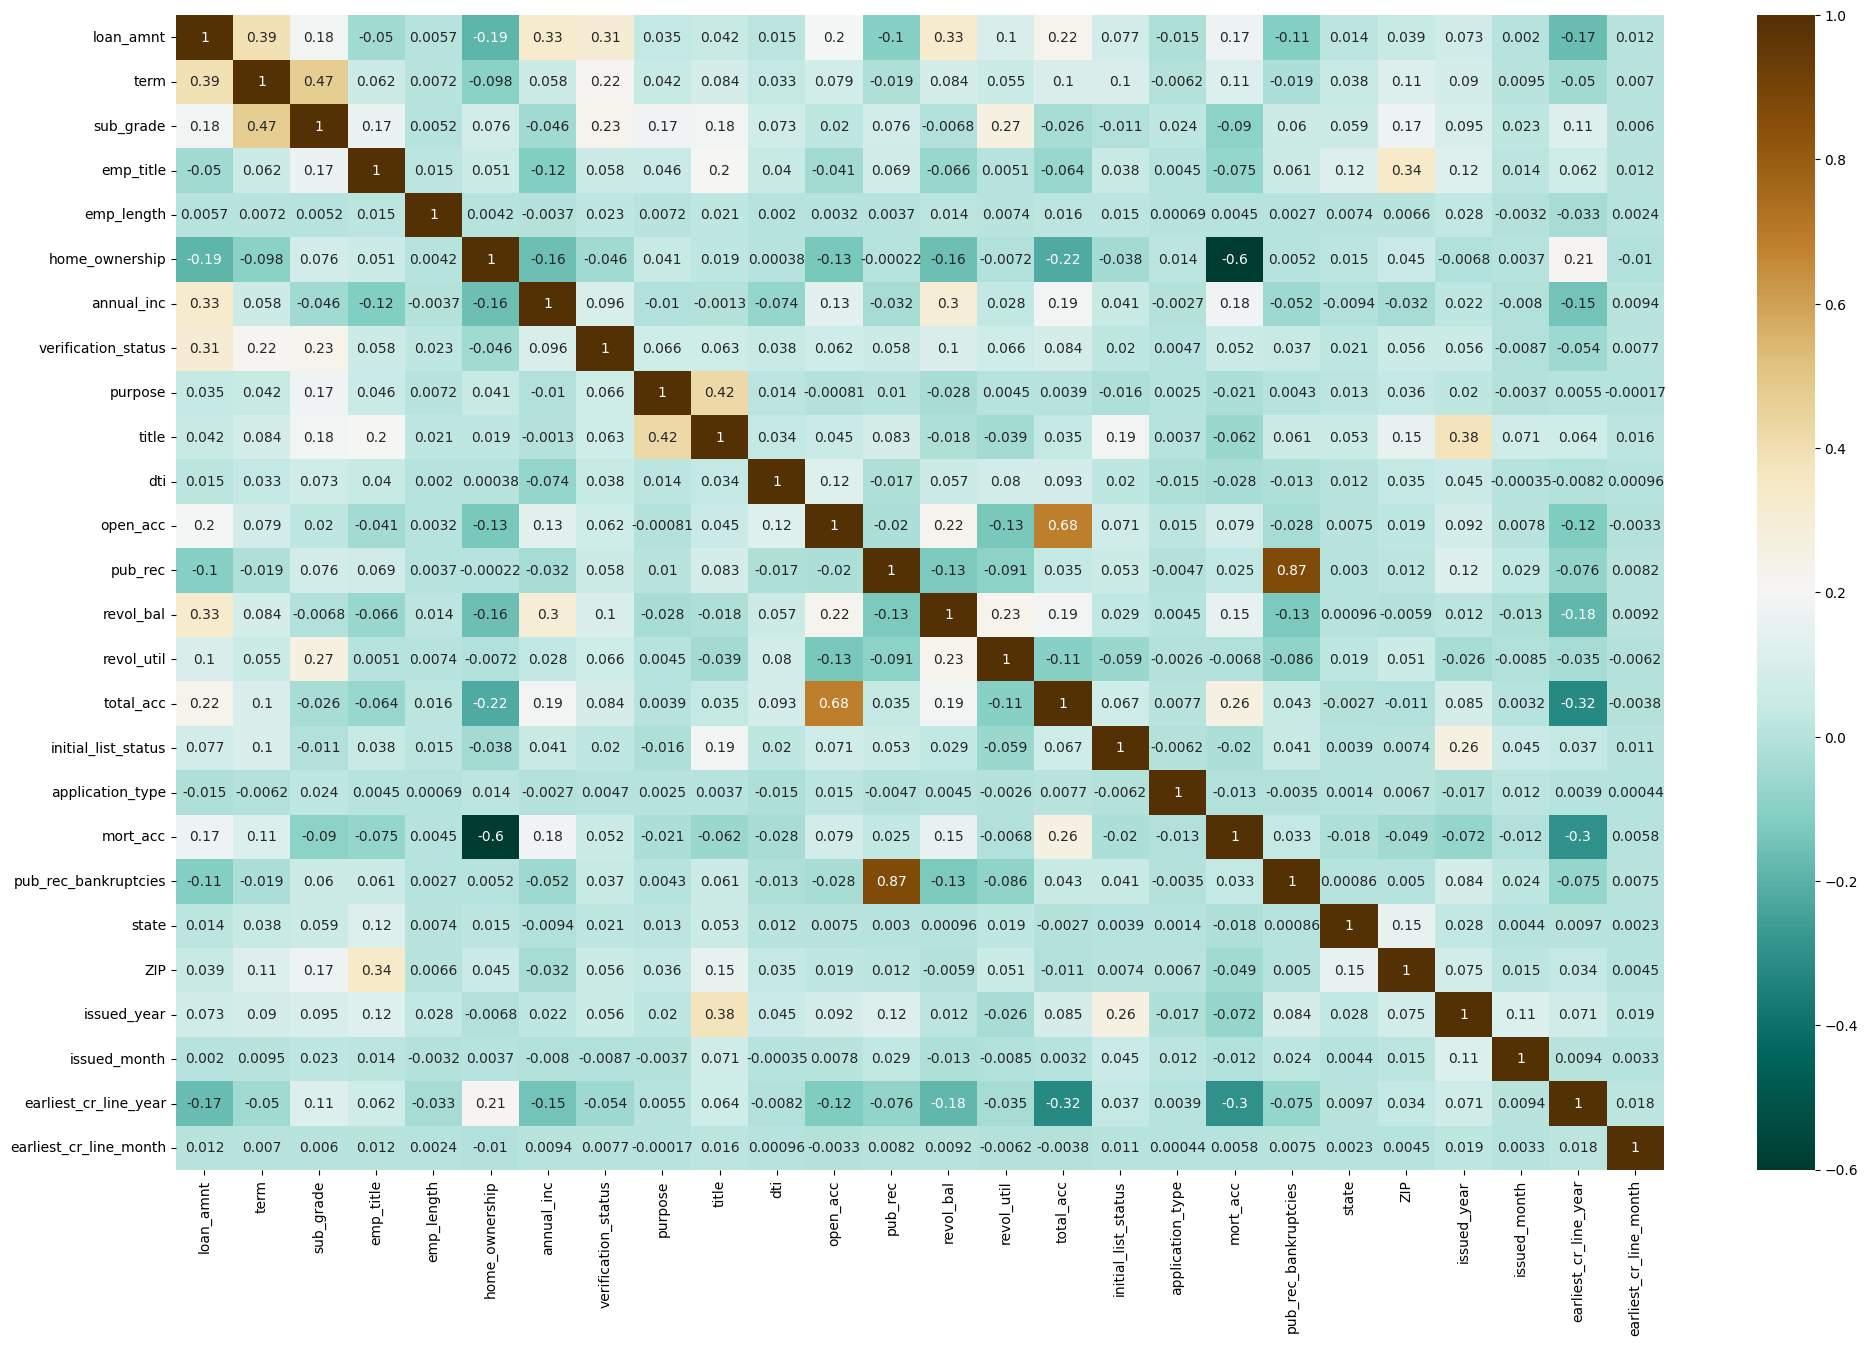

In [44]:
plt.figure(figsize=(24,15))
sns.heatmap(x_train.corr(),annot=True,cmap='BrBG_r')

plt.show()

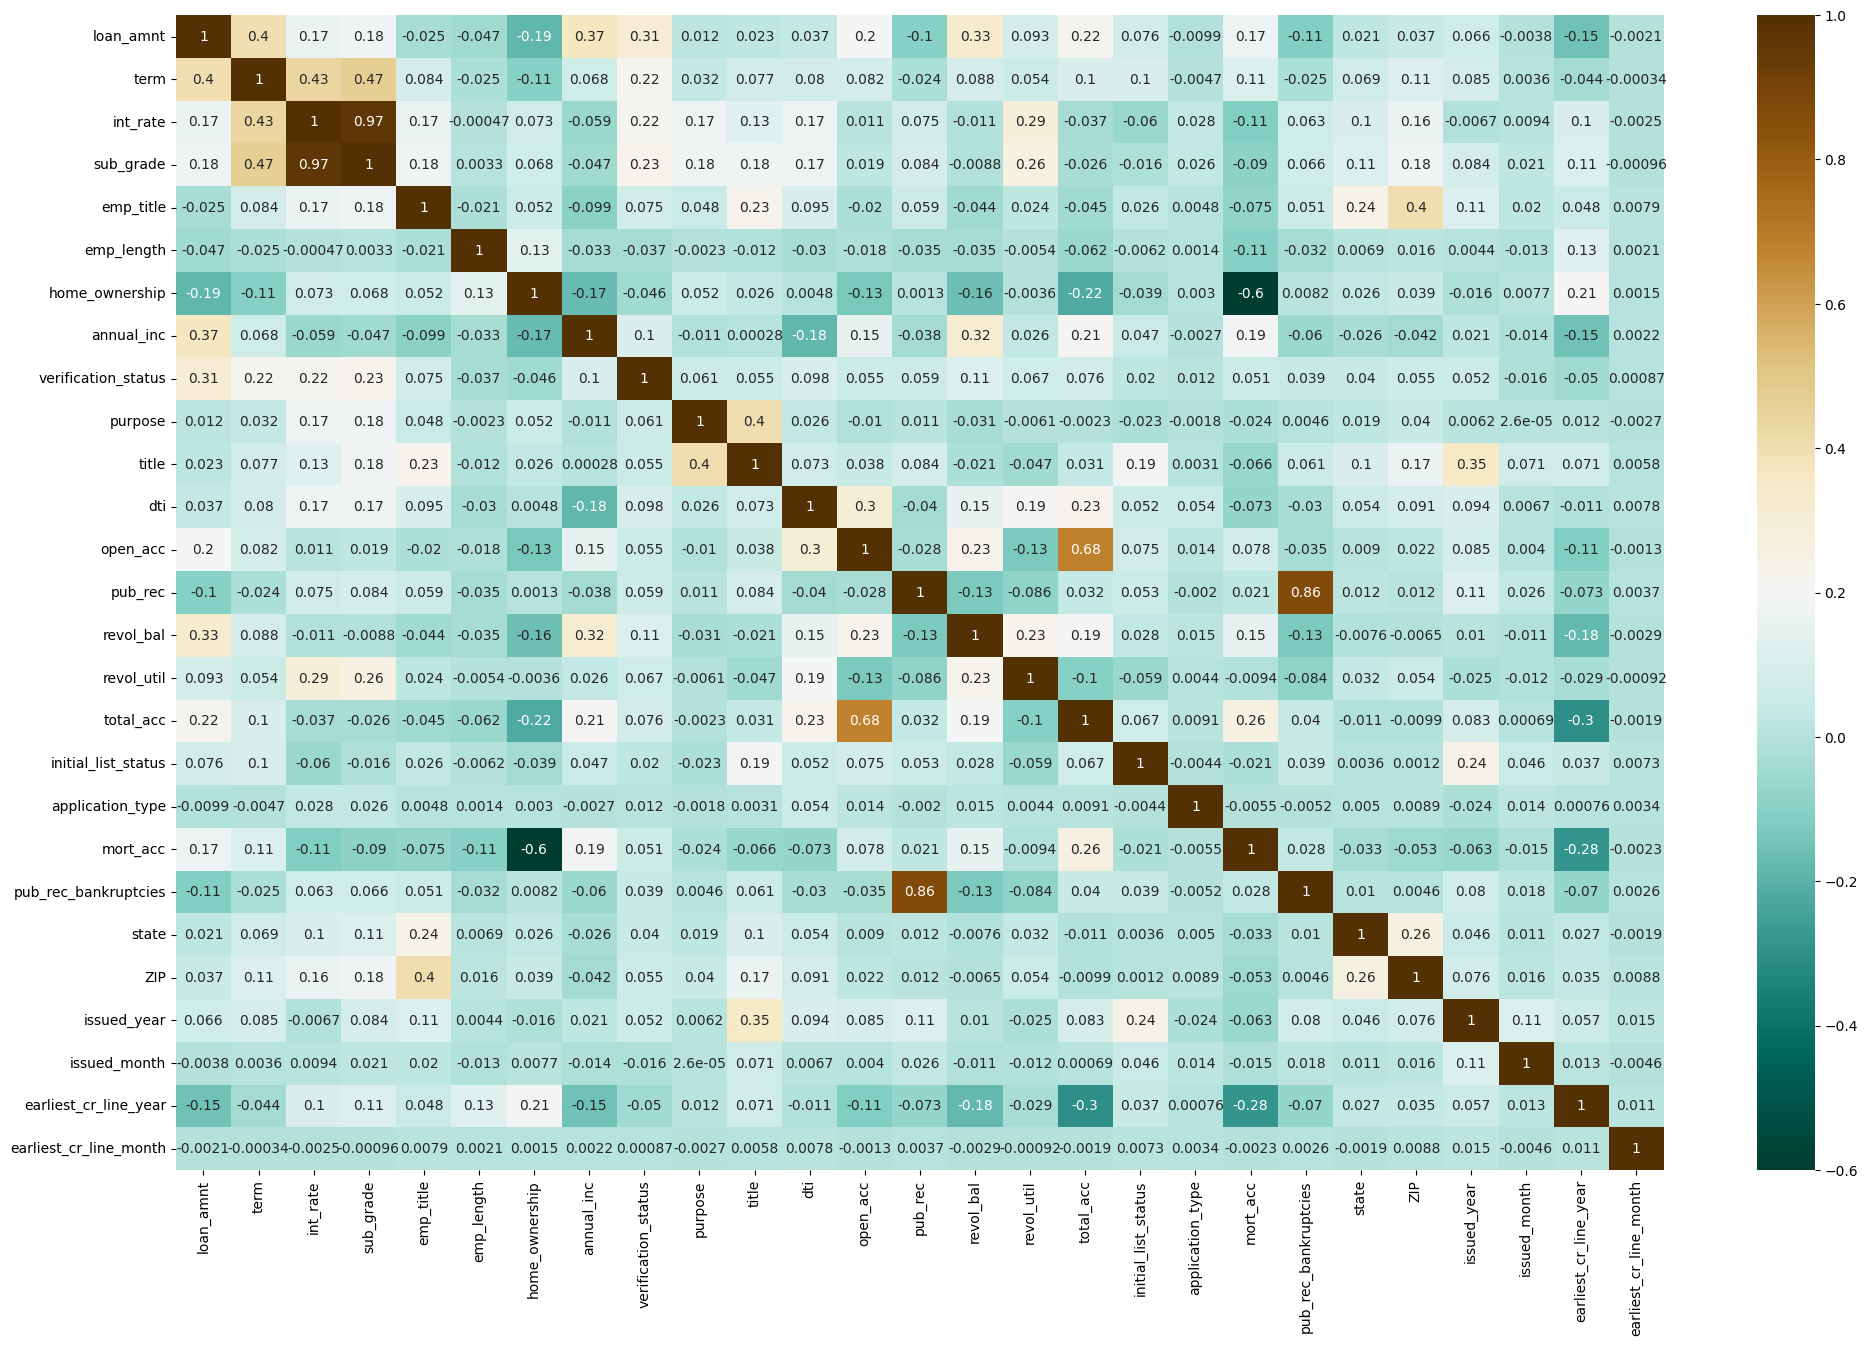

In [45]:
plt.figure(figsize=(24,15))
sns.heatmap(x_test.corr(),annot=True,cmap='BrBG_r')

plt.show()

In [46]:
x_test.drop(columns='int_rate', inplace=True)

In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', random_state=42)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(x_train_res, y_train_res)

train_preds = model.predict(x_train)

test_preds = model.predict(x_test)

In [49]:
weights = pd.DataFrame({'feature': x_train.columns, 'weight':model.coef_.flatten()})

weights = weights.sort_values(by='weight', ascending=False)

weights

,feature,weight
21,ZIP,33.896979
3,emp_title,12.944787
14,revol_util,9.426638
20,state,5.534787
9,title,5.107325
10,dti,3.890652
11,open_acc,3.440407
2,sub_grade,1.755751
17,application_type,1.170938
0,loan_amnt,0.592450


* ZIP has highest & annula_inc has lowest weights.

Train Accuracy : 0.9
Train F1 Score: 0.78
Train Recall Score: 0.89
Train Precision Score: 0.7

Test Accuracy : 0.93
Test F1 Score: 0.84
Test Recall Score: 0.91
Test Precision Score: 0.78


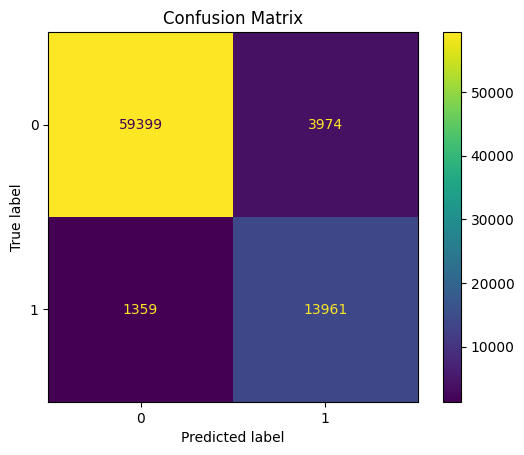

In [50]:
print('Train Accuracy :', model.score(x_train, y_train).round(2))
print('Train F1 Score:',f1_score(y_train,train_preds).round(2))
print('Train Recall Score:',recall_score(y_train,train_preds).round(2))
print('Train Precision Score:',precision_score(y_train,train_preds).round(2))

print('\nTest Accuracy :',model.score(x_test,y_test).round(2))
print('Test F1 Score:',f1_score(y_test,test_preds).round(2))
print('Test Recall Score:',recall_score(y_test,test_preds).round(2))
print('Test Precision Score:',precision_score(y_test,test_preds).round(2))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

ROC Curve & AUC

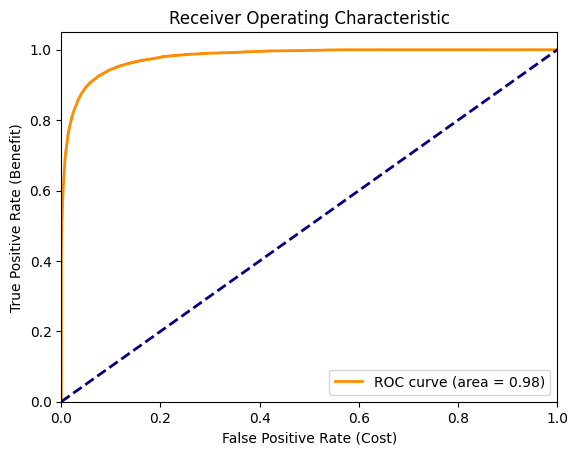

In [51]:
# Predict probabilities for the test set
probs = model.predict_proba(x_test)[:,1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Cost)')
plt.ylabel('True Positive Rate (Benefit)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* TPR is very high & FPR is low resulted in dragging the curve towards Y - Axis.

* AUC is high which indicates model able to classify properly.

* This may not ensure it works well on imbalnced data.

Optimal Threshold 

In [52]:
optimal_idx = np.argmax(tpr - fpr)

opt_thresh = thresholds[optimal_idx]

print('Optimal Threshold value is ', np.round(opt_thresh,2))

Optimal Threshold value is  0.45


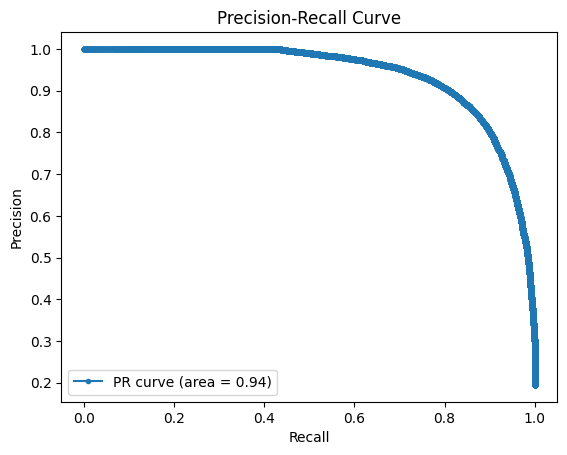

In [53]:
# Compute the false precision and recall at all thresholds
precision, recall, thresholds1 = precision_recall_curve(y_test, probs)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probs)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

* AUC is 0.94 which is very good for the model.

* It ensures that model also works well on Imbalanced Data.

How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

* Ensure that your training dataset is balanced and representative of both defaulters and non-defaulters.

* Use techniques like oversampling the minority class or undersampling the majority class to balance the dataset.

* Adjust the classification threshold based on the specific requirements of your business.

* By prioritising a High precison model.



Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. 

* If non-performing assets (NPAs) are a significant concern in the banking industry, it's understandable that there would be a strong emphasis on minimizing the risk of loan defaults. Reducing NPAs is crucial for maintaining the financial health and stability of a bank. However, adopting an extremely conservative approach of not disbursing loans to anyone may have its own set of implications.

VIF for Feature Selection

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calcualte(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['Values'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

    return vif

* Tried VIF but score is reducing rapidly

* Applying PCA to check

In [119]:
from sklearn.decomposition import PCA


pca1 = PCA(n_components=None)
X_train_pca1 = pca1.fit_transform(x_train_res)
X_test_pca1 = pca1.transform(x_test[:len(X_train_pca1)])

C:\Users\prave\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


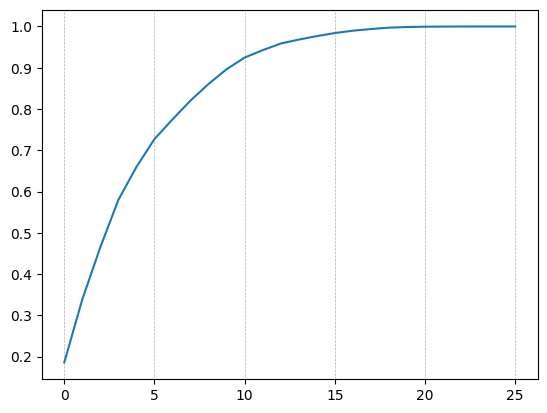

In [128]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

plt.grid(axis='x', linestyle='--', linewidth=0.5)

* Between 15 - 20 features explained the variance in the data & we can achieve the score what we achieved using Logistic Regression

F1 score (train): 0.9
F1 score (test): 0.84
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     63373
           1       0.80      0.89      0.84     15320

    accuracy                           0.94     78693
   macro avg       0.89      0.92      0.90     78693
weighted avg       0.94      0.94      0.94     78693

Confusion matrix:
[[59971  3402]
 [ 1626 13694]]


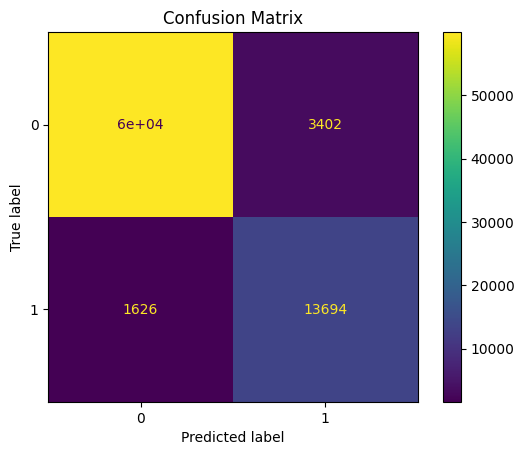

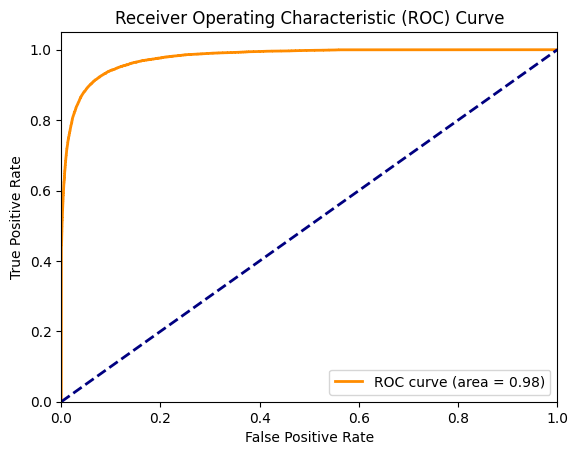

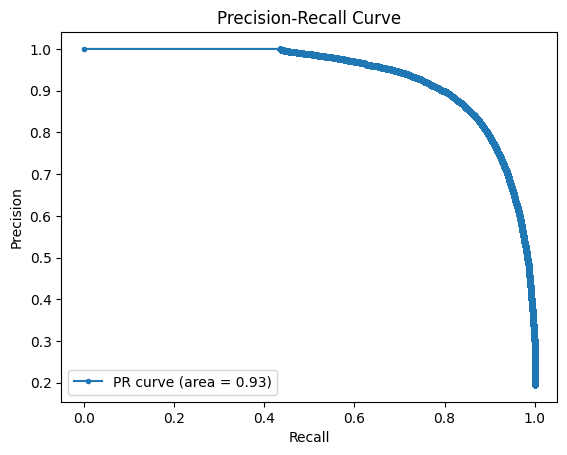

In [129]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have already defined x_train, y_train, x_test, and y_test

# Apply SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_imputed, y_train_imputed = sm.fit_resample(x_train, y_train)

# Apply PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_imputed)
X_test_pca = pca.transform(x_test[:len(X_train_pca)])

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train_imputed)

# Make predictions
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

# Evaluate the model
print("F1 score (train):", f1_score(y_train_imputed, y_pred_train).round(2))
print("F1 score (test):", f1_score(y_test, y_pred_test).round(2))

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred_test))

# Print confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test))
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot ROC-AUC curve
probs = model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probs)
auprc = average_precision_score(y_test, probs)

plt.plot(recall, precision, marker='.', label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


* Got same score after dimesion reduction